In [1]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.models import Sequential
import tensorflow as tf
with tf.device("/cpu:0"):

    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation="relu", input_shape=(150, 150, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation="relu"))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation="relu"))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(512, activation="relu"))
    model.add(Dense(1, activation="sigmoid"))
    model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 36992)             0

In [2]:
from tensorflow.keras import optimizers
with tf.device("/cpu:0"):
    model.compile(loss="binary_crossentropy", optimizer=optimizers.RMSprop(lr=1e-4), metrics=["acc"])

In [10]:
import os, shutil
original_dataset_dir = "C:/Users/galin/Downloads/Python/kagglecatsanddogs_3367a/PetImages"
base_dir = "C:/Users/galin/Downloads/Python/cats_and_dogs_small"
os.mkdir(base_dir)

train_dir = os.path.join(base_dir, "train")
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, "validation")
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, "test")
os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir, "cats")
os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, "dogs")
os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, "cats")
os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, "dogs")
os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, "cats")
os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, "dogs")
os.mkdir(test_dogs_dir)

fnames = ["{}.jpg".format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, "Cat", fname)
    dst = os.path.join(train_cats_dir, "cat." + fname)
    shutil.copyfile(src, dst)

fnames = ["{}.jpg".format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, "Cat", fname)
    dst = os.path.join(validation_cats_dir, "cat." + fname)
    shutil.copyfile(src, dst)

fnames = ["{}.jpg".format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, "Cat", fname)
    dst = os.path.join(test_cats_dir, "cat." + fname)
    shutil.copyfile(src, dst)


fnames = ["{}.jpg".format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, "Dog", fname)
    dst = os.path.join(train_dogs_dir, "dog." + fname)
    shutil.copyfile(src, dst)

fnames = ["{}.jpg".format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, "Dog", fname)
    dst = os.path.join(validation_dogs_dir, "dog." + fname)
    shutil.copyfile(src, dst)

fnames = ["{}.jpg".format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, "Dog", fname)
    dst = os.path.join(test_dogs_dir, "dog." + fname)
    shutil.copyfile(src, dst)

In [3]:
import os, shutil
original_dataset_dir = "C:/Users/galin/Downloads/Python/kagglecatsanddogs_3367a/PetImages"
base_dir = "C:/Users/galin/Downloads/Python/cats_and_dogs_small"

train_dir = os.path.join(base_dir, "train")
validation_dir = os.path.join(base_dir, "validation")
test_dir = os.path.join(base_dir, "test")

train_cats_dir = os.path.join(train_dir, "cats")
train_dogs_dir = os.path.join(train_dir, "dogs")

validation_cats_dir = os.path.join(validation_dir, "cats")
validation_dogs_dir = os.path.join(validation_dir, "dogs")

test_cats_dir = os.path.join(test_dir, "cats")
test_dogs_dir = os.path.join(test_dir, "dogs")

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=(150, 150), batch_size=20, class_mode="binary"
)
validation_generator = test_datagen.flow_from_directory(
    validation_dir, target_size=(150, 150), batch_size=20, class_mode="binary"
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [5]:
import tensorflow as tf
with tf.device("/cpu:0"):
    history = model.fit_generator(train_generator, epochs=30, validation_data=validation_generator)
    model.save("cats_and_dogs_small_1.h5")

C:\Users\galin\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
100/100 [==============================] - 101s 996ms/step - loss: 0.7152 - acc: 0.5188 - val_loss: 0.6421 - val_acc: 0.6430
Epoch 2/30
100/100 [==============================] - 104s 1s/step - loss: 0.6479 - acc: 0.6478 - val_loss: 0.6039 - val_acc: 0.6760
Epoch 3/30
100/100 [==============================] - 99s 985ms/step - loss: 0.5626 - acc: 0.7021 - val_loss: 0.6410 - val_acc: 0.6430
Epoch 4/30
100/100 [==============================] - 100s 999ms/step - loss: 0.5109 - acc: 0.7594 - val_loss: 0.6059 - val_acc: 0.6650
Epoch 5/30
100/100 [==============================] - 96s 960ms/step - loss: 0.4836 - acc: 0.7779 - val_loss: 0.5843 - val_acc: 0.6940
Epoch 6/30
100/100 [==============================] - 98s 984ms/step - loss: 0.4508 - acc: 0.7961 - val_loss: 0.5659 - val_acc: 0.7070
Epoch 7/30
100/100 [==============================] - 96s 961ms/step - loss: 0.4013 - acc: 0.8250 - val_loss: 0.5732 - val_acc: 0.7190
Epoch 8/30
100/100 [==============================] - 9

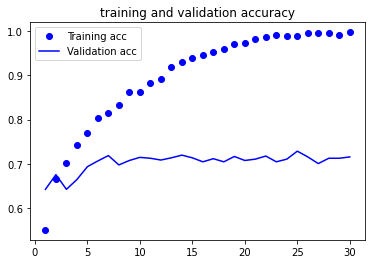

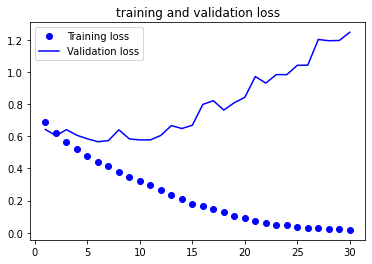

In [6]:
import matplotlib.pyplot as plt
acc = history.history["acc"]
val_acc = history.history["val_acc"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("training and validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("training and validation loss")
plt.legend()

plt.show()

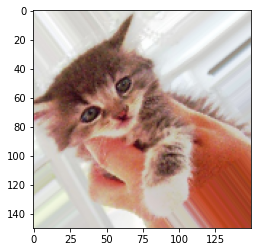

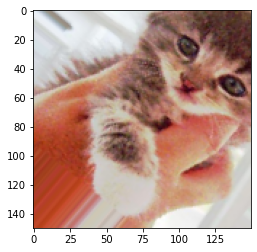

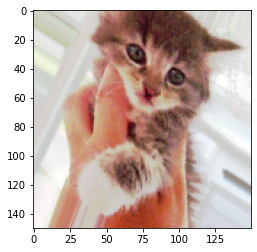

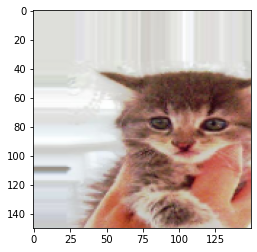

In [10]:
datagen = ImageDataGenerator(
    rotation_range=40, 
    width_shift_range=0.2, 
    height_shift_range=0.2, 
    shear_range=0.2, 
    zoom_range=0.2, 
    horizontal_flip=True, 
    fill_mode = "nearest"
)

from tensorflow.keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
img_path = fnames[3]
img = image.load_img(img_path, target_size=(150, 150))
x = image.img_to_array(img)
x = x.reshape((1, ) + x.shape)
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

In [12]:
from tensorflow.keras.layers import Dropout

with tf.device("/cpu:0"):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation="relu", input_shape=(150, 150, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation="relu"))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation="relu"))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation="relu"))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dropout(0.5))
    model.add(Dense(512, activation="relu"))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(loss="binary_crossentropy", optimizer=optimizers.RMSprop(lr=1e-4), metrics=["acc"])

    train_datagen = ImageDataGenerator(
        rescale=1./255, rotation_range=40, width_shift_range=0.2, 
        height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True
    )
    
    test_datagen = ImageDataGenerator(rescale=1./255)
    
    train_genarator = train_datagen.flow_from_directory(
        train_dir, target_size=(150, 150), batch_size=32, class_mode="binary"
    )
    validation_generator = test_datagen.flow_from_directory(
        validation_dir, target_size=(150, 150), batch_size=32, class_mode="binary"
    )
    
    history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=100, validation_data=validation_generator, validation_steps=50)
    model.save("cats_and_dogs_small_2.h5")

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


C:\Users\galin\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
100/100 [==============================] - 71s 697ms/step - loss: 0.7003 - acc: 0.4992 - val_loss: 0.6822 - val_acc: 0.6070
Epoch 2/100
100/100 [==============================] - 80s 803ms/step - loss: 0.6846 - acc: 0.5780
Epoch 3/100
100/100 [==============================] - 86s 861ms/step - loss: 0.6599 - acc: 0.5969
Epoch 4/100
100/100 [==============================] - 89s 887ms/step - loss: 0.6085 - acc: 0.6699
Epoch 5/100
100/100 [==============================] - 88s 882ms/step - loss: 0.5832 - acc: 0.6845
Epoch 6/100
100/100 [==============================] - 88s 881ms/step - loss: 0.5436 - acc: 0.7292
Epoch 7/100
100/100 [==============================] - 88s 882ms/step - loss: 0.5372 - acc: 0.7291
Epoch 8/100
100/100 [==============================] - 87s 865ms/step - loss: 0.4954 - acc: 0.7565
Epoch 9/100
100/100 [==============================] - 87s 869ms/step - loss: 0.4847 - acc: 0.7606
Epoch 10/100
100/100 [==============================] - 82s 821ms/step -

100/100 [==============================] - 70s 697ms/step - loss: 0.0549 - acc: 0.9808
Epoch 80/100
100/100 [==============================] - 71s 710ms/step - loss: 0.0390 - acc: 0.9894
Epoch 81/100
100/100 [==============================] - 69s 692ms/step - loss: 0.0415 - acc: 0.9832
Epoch 82/100
100/100 [==============================] - 67s 667ms/step - loss: 0.0316 - acc: 0.9883
Epoch 83/100
100/100 [==============================] - 70s 702ms/step - loss: 0.0512 - acc: 0.9806
Epoch 84/100
100/100 [==============================] - 72s 717ms/step - loss: 0.0280 - acc: 0.9913
Epoch 85/100
100/100 [==============================] - 70s 699ms/step - loss: 0.0219 - acc: 0.9930
Epoch 86/100
100/100 [==============================] - 71s 713ms/step - loss: 0.0383 - acc: 0.9862
Epoch 87/100
100/100 [==============================] - 66s 664ms/step - loss: 0.0323 - acc: 0.9890
Epoch 88/100
100/100 [==============================] - 67s 673ms/step - loss: 0.0233 - acc: 0.9935
Epoch 89/100


ValueError: x and y must have same first dimension, but have shapes (100,) and (1,)

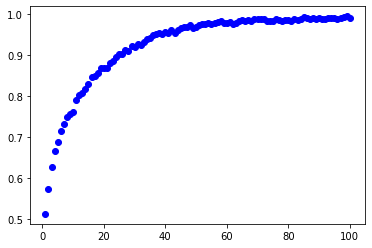

In [13]:
import matplotlib.pyplot as plt
acc = history.history["acc"]
val_acc = history.history["val_acc"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("training and validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("training and validation loss")
plt.legend()

plt.show()

In [20]:
train_dir

'C:/Users/galin/Downloads/Python/cats_and_dogs_small\\train'